In [43]:
import numpy as np
import copy

# Problem modelling imports
from docplex.mp.model import Model

# Qiskit imports
from qiskit import BasicAer
from qiskit.utils import QuantumInstance
from qiskit.algorithms import QAOA, NumPyMinimumEigensolver
from qiskit_optimization.algorithms import WarmStartQAOAOptimizer
from qiskit.utils.algorithm_globals import algorithm_globals
from qiskit_optimization.algorithms import MinimumEigenOptimizer, CplexOptimizer
from qiskit_optimization import QuadraticProgram
from qiskit_optimization.problems.variable import VarType
from qiskit_optimization.converters.quadratic_program_to_qubo import QuadraticProgramToQubo
from qiskit_optimization.translators import from_docplex_mp

from qiskit import BasicAer
from qiskit.utils import algorithm_globals, QuantumInstance
from qiskit.algorithms import QAOA, NumPyMinimumEigensolver
from qiskit.algorithms.optimizers import COBYLA
from qiskit_optimization.algorithms import (
    MinimumEigenOptimizer,
    RecursiveMinimumEigenOptimizer,
    SolutionSample,
    OptimizationResultStatus,
)
from qiskit_optimization import QuadraticProgram
from qiskit.visualization import plot_histogram
from typing import List, Tuple
import numpy as np

In [23]:
from pyqubo import Binary, Spin
import numpy as np

def QUBO(number_set):
    """
    Args:
    1) A matrix of the distances (upper triangular)
    2) Vector of the times
    3) Number of bits in the floating-point approximation
    4) If ising = True, the output is an ising model

    Output:
    A linear system problem written as a qubo formulation

    """

    qubo=0
    for k,n in enumerate(number_set):
        qubo += n*(2*Binary("s"+str(k+1))-1)

    return qubo**2

In [24]:
import csv
import pandas as pd

easy_set = pd.read_csv(r'C:/Users/OS-5818/OneDrive/Documentos/Anton/bloot/set-partitioning-qc/data/Set_1000_easy_03.txt')
hard_set = pd.read_csv(r'C:/Users/OS-5818/OneDrive/Documentos/Anton/bloot/set-partitioning-qc/data/Set_1000_Hard_095.txt')
medium_set = pd.read_csv(r'C:/Users/OS-5818/OneDrive/Documentos/Anton/bloot/set-partitioning-qc/data/Set_1000_Medium_05.txt')

In [35]:
###############################################
best_strings=[]; cost_values=[]
for j in range(easy_set.shape[0]):
    
    print(15*"#", "Iteration: ", j, 15*"#")

    qubo_of = QUBO(list(easy_set.iloc[j,:]))

    model = qubo_of.compile()
    quadratic, offset = model.to_qubo()
    
    qubo = QuadraticProgram()

    for i in range(1,11):
        qubo.binary_var("s"+str(i))
    
    qubo.minimize(linear=None, quadratic=quadratic)

    op, offset = qubo.to_ising()
    
    algorithm_globals.random_seed = (j+1)*11345
    quantum_instance = QuantumInstance(
        BasicAer.get_backend("qasm_simulator"),
        seed_simulator=algorithm_globals.random_seed,
        seed_transpiler=algorithm_globals.random_seed,
    )
    
    qaoa_mes = QAOA(quantum_instance=quantum_instance, initial_point=[0.0, 1.0])
    ws_qaoa = WarmStartQAOAOptimizer(
        pre_solver=CplexOptimizer(), relax_for_pre_solver=True, qaoa=qaoa_mes, epsilon=0.0
        )

    qaoa = MinimumEigenOptimizer(qaoa_mes)  # using QAOA

    qaoa_result = qaoa.solve(qubo)
    print(qaoa_result)
    

    loss = 0
    for i,n in zip(list(qaoa_result), list(easy_set.iloc[j,:])):
        if i==0:
            loss += n
        elif i==1:
            loss -= n

    print("Set summation: ", sum(list(easy_set.iloc[j,:])),"Eigenstate with higher probability: ", qaoa_result, "Associated cost: ", abs(loss))
    best_strings.append(qaoa_result)
    cost_values.append(abs(loss))
    #min_en = best_cost(counts=counts)
    #costs.append(min_en)



############### Iteration:  0 ###############
optimal function value: -2304.0
optimal value: [1. 0. 1. 0. 1. 0. 1. 0. 0. 0.]
status: SUCCESS
Set summation:  48 Eigenstate with higher probability:  optimal function value: -2304.0
optimal value: [1. 0. 1. 0. 1. 0. 1. 0. 0. 0.]
status: SUCCESS Associated cost:  0
############### Iteration:  1 ###############
optimal function value: -1520.0
optimal value: [1. 1. 1. 1. 1. 0. 0. 0. 0. 0.]
status: SUCCESS
Set summation:  39 Eigenstate with higher probability:  optimal function value: -1520.0
optimal value: [1. 1. 1. 1. 1. 0. 0. 0. 0. 0.]
status: SUCCESS Associated cost:  1
############### Iteration:  2 ###############
optimal function value: -2116.0
optimal value: [1. 1. 1. 1. 1. 0. 0. 0. 0. 0.]
status: SUCCESS
Set summation:  46 Eigenstate with higher probability:  optimal function value: -2116.0
optimal value: [1. 1. 1. 1. 1. 0. 0. 0. 0. 0.]
status: SUCCESS Associated cost:  0
############### Iteration:  3 ###############
optimal function v

In [38]:
cost_values.count(0)

482

In [36]:
###############################################
best_strings_hard=[]; cost_values_hard=[]
for j in range(hard_set.shape[0]):
    
    print(15*"#", "Iteration: ", j, 15*"#")

    qubo_of = QUBO(list(hard_set.iloc[j,:]))

    model = qubo_of.compile()
    quadratic, offset = model.to_qubo()
    
    qubo = QuadraticProgram()

    for i in range(1,11):
        qubo.binary_var("s"+str(i))
    
    qubo.minimize(linear=None, quadratic=quadratic)

    op, offset = qubo.to_ising()
    
    algorithm_globals.random_seed = (j+1)*11345
    quantum_instance = QuantumInstance(
        BasicAer.get_backend("qasm_simulator"),
        seed_simulator=algorithm_globals.random_seed,
        seed_transpiler=algorithm_globals.random_seed,
    )
    
    qaoa_mes = QAOA(quantum_instance=quantum_instance, initial_point=[0.0, 1.0])
    ws_qaoa = WarmStartQAOAOptimizer(
        pre_solver=CplexOptimizer(), relax_for_pre_solver=True, qaoa=qaoa_mes, epsilon=0.0
        )

    qaoa = MinimumEigenOptimizer(qaoa_mes)  # using QAOA

    qaoa_result = qaoa.solve(qubo)
    print(qaoa_result)
    

    loss = 0
    for i,n in zip(list(qaoa_result), list(hard_set.iloc[j,:])):
        if i==0:
            loss += n
        elif i==1:
            loss -= n

    print("Set summation: ", sum(list(hard_set.iloc[j,:])),"Eigenstate with higher probability: ", qaoa_result, "Associated cost: ", abs(loss))
    best_strings_hard.append(qaoa_result)
    cost_values_hard.append(abs(loss))
    #min_en = best_cost(counts=counts)
    #costs.append(min_en)


############### Iteration:  0 ###############
optimal function value: -5166528.0
optimal value: [0. 1. 1. 0. 0. 0. 0. 1. 1. 0.]
status: SUCCESS
Set summation:  2273 Eigenstate with higher probability:  optimal function value: -5166528.0
optimal value: [0. 1. 1. 0. 0. 0. 0. 1. 1. 0.]
status: SUCCESS Associated cost:  1
############### Iteration:  1 ###############
optimal function value: -11343424.0
optimal value: [1. 0. 0. 1. 0. 1. 0. 1. 0. 1.]
status: SUCCESS
Set summation:  3368 Eigenstate with higher probability:  optimal function value: -11343424.0
optimal value: [1. 0. 0. 1. 0. 1. 0. 1. 0. 1.]
status: SUCCESS Associated cost:  0
############### Iteration:  2 ###############
optimal function value: -11269424.0
optimal value: [1. 0. 0. 1. 1. 1. 0. 1. 0. 0.]
status: SUCCESS
Set summation:  3357 Eigenstate with higher probability:  optimal function value: -11269424.0
optimal value: [1. 0. 0. 1. 1. 1. 0. 1. 0. 0.]
status: SUCCESS Associated cost:  5
############### Iteration:  3 ######

In [37]:
cost_values_hard.count(0)

104

In [45]:
qubo_of = QUBO(list(hard_set.iloc[0,:]))

model = qubo_of.compile()
quadratic, offset = model.to_qubo()

qubo = QuadraticProgram()

for i in range(1,11):
    qubo.binary_var("s"+str(i))

qubo.minimize(linear=None, quadratic=quadratic)

op, offset = qubo.to_ising()

algorithm_globals.random_seed = 11345
quantum_instance = QuantumInstance(
    BasicAer.get_backend("qasm_simulator"),
    seed_simulator=algorithm_globals.random_seed,
    seed_transpiler=algorithm_globals.random_seed,
)

counts = []
values = []
def store_intermediate_result(eval_count, parameters, mean, std):
    counts.append(eval_count)
    values.append(mean)

qaoa_mes = QAOA(optimizer=COBYLA(maxiter=150), quantum_instance=quantum_instance, initial_point=[0.0, 1.0], callback=store_intermediate_result)
ws_qaoa = WarmStartQAOAOptimizer(
    pre_solver=CplexOptimizer(), relax_for_pre_solver=True, qaoa=qaoa_mes, epsilon=0.0
    )

qaoa = MinimumEigenOptimizer(qaoa_mes)  # using QAOA

qaoa_result = qaoa.solve(qubo)
print(qaoa_result)

optimal function value: -5166528.0
optimal value: [1. 0. 1. 0. 0. 1. 1. 0. 0. 0.]
status: SUCCESS


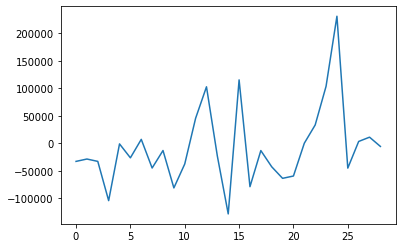

In [48]:
import matplotlib.pyplot as plt
plt.plot(values)